In [ ]:
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/LXLpXvrR5RI" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

# **SUBSCRIBE to the [channel](https://www.youtube.com/user/19daredevill?sub_confirmation=1) to learn cool things every week**
# **Keep Learning -> Keep Growing**

![Subscribe](https://media3.giphy.com/media/XGILFirobxDWglaUyj/giphy.gif?cid=ecf05e474afdd7ef5fe2c0fa50f87822d705fbb2613a3b5c&rid=giphy.gif)

In [2]:
!git clone https://github.com/ultralytics/yolov5
!pip install -qr yolov5/requirements.txt
%cd yolov5

import torch
from IPython.display import Image, clear_output
from utils.google_utils import gdrive_download

clear_output()

In [3]:
%cd /content
!curl -L "https://public.roboflow.com/ds/aSEBUPDESd?key=pRpHwkTKbb" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

/content
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   896  100   896    0     0   1681      0 --:--:-- --:--:-- --:--:--  1677
100 22.3M  100 22.3M    0     0  21.5M      0  0:00:01  0:00:01 --:--:-- 21.5M
Archive:  roboflow.zip
 extracting: test/images/G7_jpg.rf.04faf434dd590a7bd02818b2b57a704f.jpg  
 extracting: test/images/S6_jpg.rf.0b6e42445a56998369cdd3759c2cf3d4.jpg  
 extracting: test/images/T24_jpg.rf.068e7b2424eac996c86bb6d9c38e083d.jpg  
 extracting: test/images/K12_jpg.rf.1bd849de853e33f6262b6643555e098f.jpg  
 extracting: test/images/J9_jpg.rf.213a9e356777a13d336e4988c33a93e1.jpg  
 extracting: test/images/X9_jpg.rf.28187742b082579d85eda81cf98bf5bb.jpg  
 extracting: test/images/B15_jpg.rf.0f0628552139144fc67c453e1f1b7b15.jpg  
 extracting: test/images/W24_jpg.rf.1bc37c6fc4770b284edc6f9027eb6cf2.jpg  
 extracting: test/images/S16_jpg.rf.138a4aa81180adcc2432

In [4]:
#extracting information from the roboflow file
%cat data.yaml

train: ../train/images
val: ../valid/images

nc: 26
names: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

In [6]:
# define number of classes based on data.yaml
import yaml
with open("data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [7]:
%cat /content/yolov5/models/yolov5s.yaml

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, C3, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, Fa

In [8]:
#customize iPython writefile so we can write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [9]:
%%writetemplate /content/yolov5/models/custom_yolov5s.yaml

# parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, BottleneckCSP, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, BottleneckCSP, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, BottleneckCSP, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, BottleneckCSP, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

In [10]:
# train yolov5s on custom data for 100 epochs
# time its performance
%%time
%cd /content/yolov5/
!python train.py --img 416 --batch 16 --epochs 100 --data '../data.yaml' --cfg ./models/custom_yolov5s.yaml --weights '' --name yolov5s_results  --cache

/content/yolov5
train: weights=, cfg=./models/custom_yolov5s.yaml, data=../data.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=100, batch_size=16, img_size=[416], rect=False, resume=False, nosave=False, notest=False, noautoanchor=False, evolve=None, bucket=, cache_images=True, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, entity=None, name=yolov5s_results, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias=latest, local_rank=-1
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v5.0-273-g850970e torch 1.9.0+cu102 CUDA:0 (Tesla T4, 15109.75MB)

hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degree

In [11]:
!python detect.py --weights runs/train/yolov5s_results/weights/best.pt --img 416 --conf 0.4 --source ../test/images

detect: weights=['runs/train/yolov5s_results/weights/best.pt'], source=../test/images, imgsz=416, conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False
YOLOv5 🚀 v5.0-273-g850970e torch 1.9.0+cu102 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Model Summary: 232 layers, 7313943 parameters, 0 gradients, 17.0 GFLOPs
image

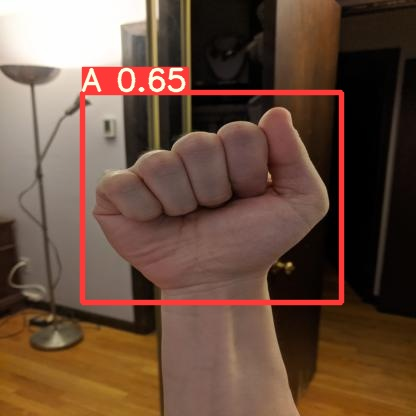

In [17]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/A22_jpg.rf.f02ad8558ce1c88213b4f83c0bc66bc8.jpg'):
    display(Image(filename=imageName))
    print("\n")

# For Video Detection

In [18]:
!python detect.py --weights runs/train/yolov5s_results/weights/last.pt --source /content/testing_vedio.mp4 --conf 0.4

Streaming output truncated to the last 5000 lines.
video 1/1 (4312/9309) /content/testing_vedio.mp4: 384x640 Done. (0.011s)
video 1/1 (4313/9309) /content/testing_vedio.mp4: 384x640 Done. (0.011s)
video 1/1 (4314/9309) /content/testing_vedio.mp4: 384x640 Done. (0.011s)
video 1/1 (4315/9309) /content/testing_vedio.mp4: 384x640 Done. (0.011s)
video 1/1 (4316/9309) /content/testing_vedio.mp4: 384x640 Done. (0.011s)
video 1/1 (4317/9309) /content/testing_vedio.mp4: 384x640 Done. (0.011s)
video 1/1 (4318/9309) /content/testing_vedio.mp4: 384x640 Done. (0.011s)
video 1/1 (4319/9309) /content/testing_vedio.mp4: 384x640 Done. (0.011s)
video 1/1 (4320/9309) /content/testing_vedio.mp4: 384x640 Done. (0.011s)
video 1/1 (4321/9309) /content/testing_vedio.mp4: 384x640 Done. (0.011s)
video 1/1 (4322/9309) /content/testing_vedio.mp4: 384x640 Done. (0.011s)
video 1/1 (4323/9309) /content/testing_vedio.mp4: 384x640 Done. (0.011s)
video 1/1 (4324/9309) /content/testing_vedio.mp4: 384x640 1 K, Done. (0.0